In [27]:
from pynput.mouse import Listener
from PIL import ImageGrab
import cv2
import matplotlib.pyplot as plt

In [28]:
start_x, start_y = -1, -1
end_x, end_y = -1, -1

822 881 Button.left True
822 881 Button.left False
821 817 Button.right True
821 817 Button.right False
1032 782 Button.left True
1032 782 Button.left False
756 729 Button.right True
950 869 Button.right False
756 729 950 869


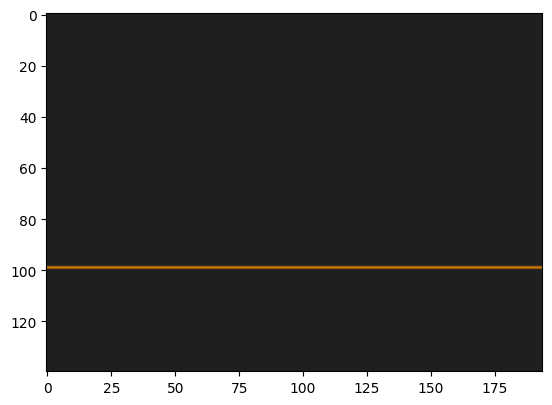

In [29]:
def on_click(x, y, button, pressed):
    global start_x, start_y, end_x, end_y

    if pressed:
        start_x, start_y = x, y
    else:
        end_x, end_y = x, y
        if abs(end_x - start_x) > 64 and abs(end_y - start_y) > 64:
            listener.stop()
    print(x, y, button, pressed)

with Listener(on_click=on_click) as listener:
    listener.join()


start_x, end_x = min(start_x, end_x), max(start_x, end_x)
start_y, end_y = min(start_y, end_y), max(start_y, end_y)

print(start_x, start_y, end_x, end_y)

if start_x != -1 and start_y != -1 and end_x != -1 and end_y != -1:
    screenshot = ImageGrab.grab(bbox=(start_x, start_y, end_x, end_y))
    screenshot.save("captured_image.png")

    image = cv2.imread("captured_image.png")
    plt.imshow(image)
else:
    print("드래그한 영역이 없습니다.")